<a href="https://colab.research.google.com/github/angiegh2002/DM-ML/blob/main/DM%26ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#import library

In [1]:
!pip install missingno

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import math


#louding data

In [4]:
df=pd.read_csv('/content/drive/MyDrive/DM&ML/Loan_Default.csv')

In [5]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

#EDA

##Statistical Summary

In [ ]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


<div dir="rtl">

- جميع المتغيرات العددية يوجد فيها outlayer باستثناء rate_of_interest,	Interest_rate_spread,Credit_Score تحتاج الى فخص بصري للتاكد
- ايضا متغير الهدف Status يوجد عدم توازن بالقيم
</div>

In [ ]:
missing_percent= df.isnull().mean().sort_values(ascending=False)*100
missing_percent[missing_percent > 0]

,0
Upfront_charges,26.664425
Interest_rate_spread,24.644515
rate_of_interest,24.509989
dtir1,16.224524
property_value,10.155378
LTV,10.155378
income,6.154571
loan_limit,2.249277
approv_in_adv,0.610749
age,0.134526


In [ ]:
missing = df.isnull().sum().sort_values(ascending=False)
missing[missing > 0]

,0
Upfront_charges,39642
Interest_rate_spread,36639
rate_of_interest,36439
dtir1,24121
property_value,15098
LTV,15098
income,9150
loan_limit,3344
approv_in_adv,908
age,200


In [ ]:
print(df.nunique())

ID                           148670
year                              1
loan_limit                        2
Gender                            4
approv_in_adv                     2
loan_type                         3
loan_purpose                      4
Credit_Worthiness                 2
open_credit                       2
business_or_commercial            2
loan_amount                     211
rate_of_interest                131
Interest_rate_spread          22516
Upfront_charges               58271
term                             26
Neg_ammortization                 2
interest_only                     2
lump_sum_payment                  2
property_value                  385
construction_type                 2
occupancy_type                    3
Secured_by                        2
total_units                       4
income                         1001
credit_type                       4
Credit_Score                    401
co-applicant_credit_type          2
age                         

In [ ]:
print(df.duplicated().sum())

0


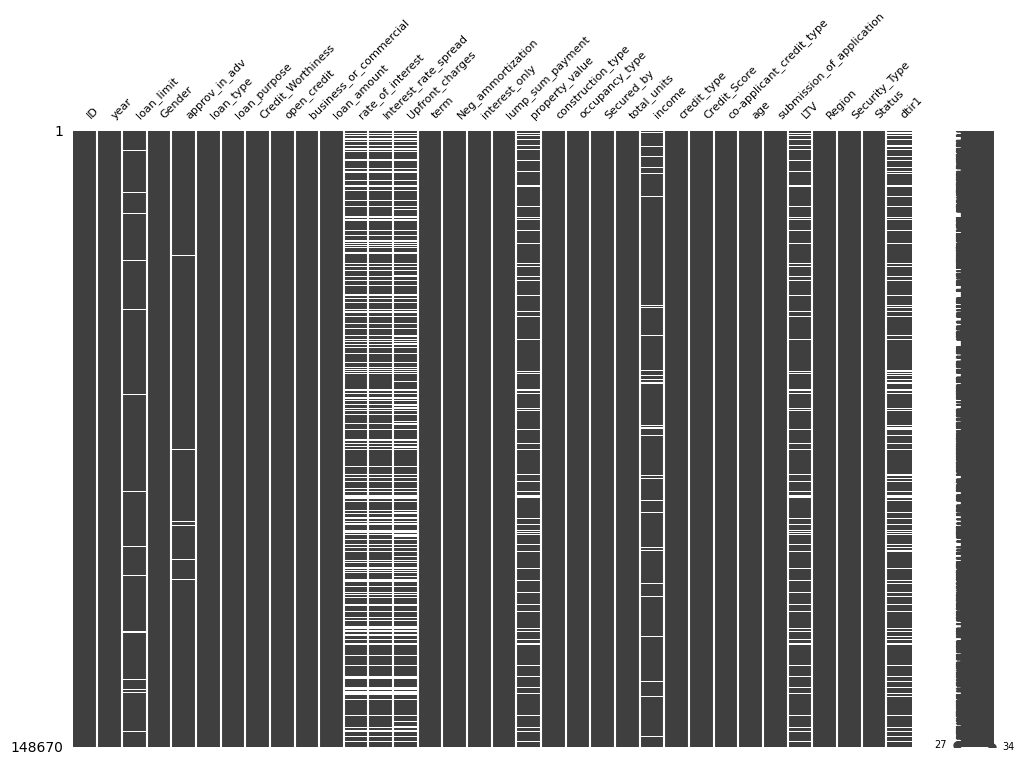

In [ ]:
msno.matrix(df, figsize=(12, 8),fontsize=8)
plt.show()

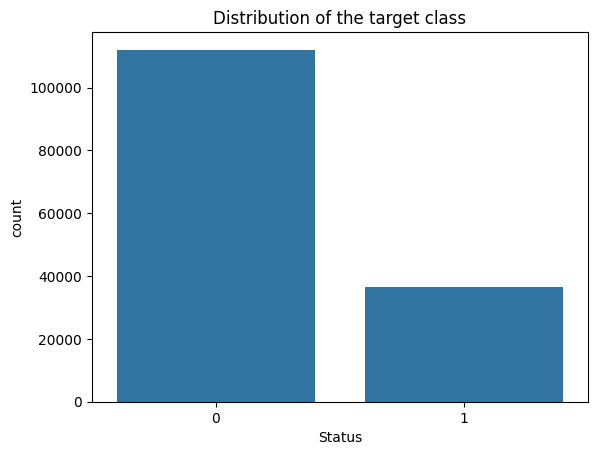

,proportion
Status,
0,75.355485
1,24.644515


In [ ]:
sns.countplot(x='Status', data=df)
plt.title("Distribution of the target class")
plt.show()
df['Status'].value_counts(normalize=True) * 100

- يوجد عدم نوازن في المتغير الهدف

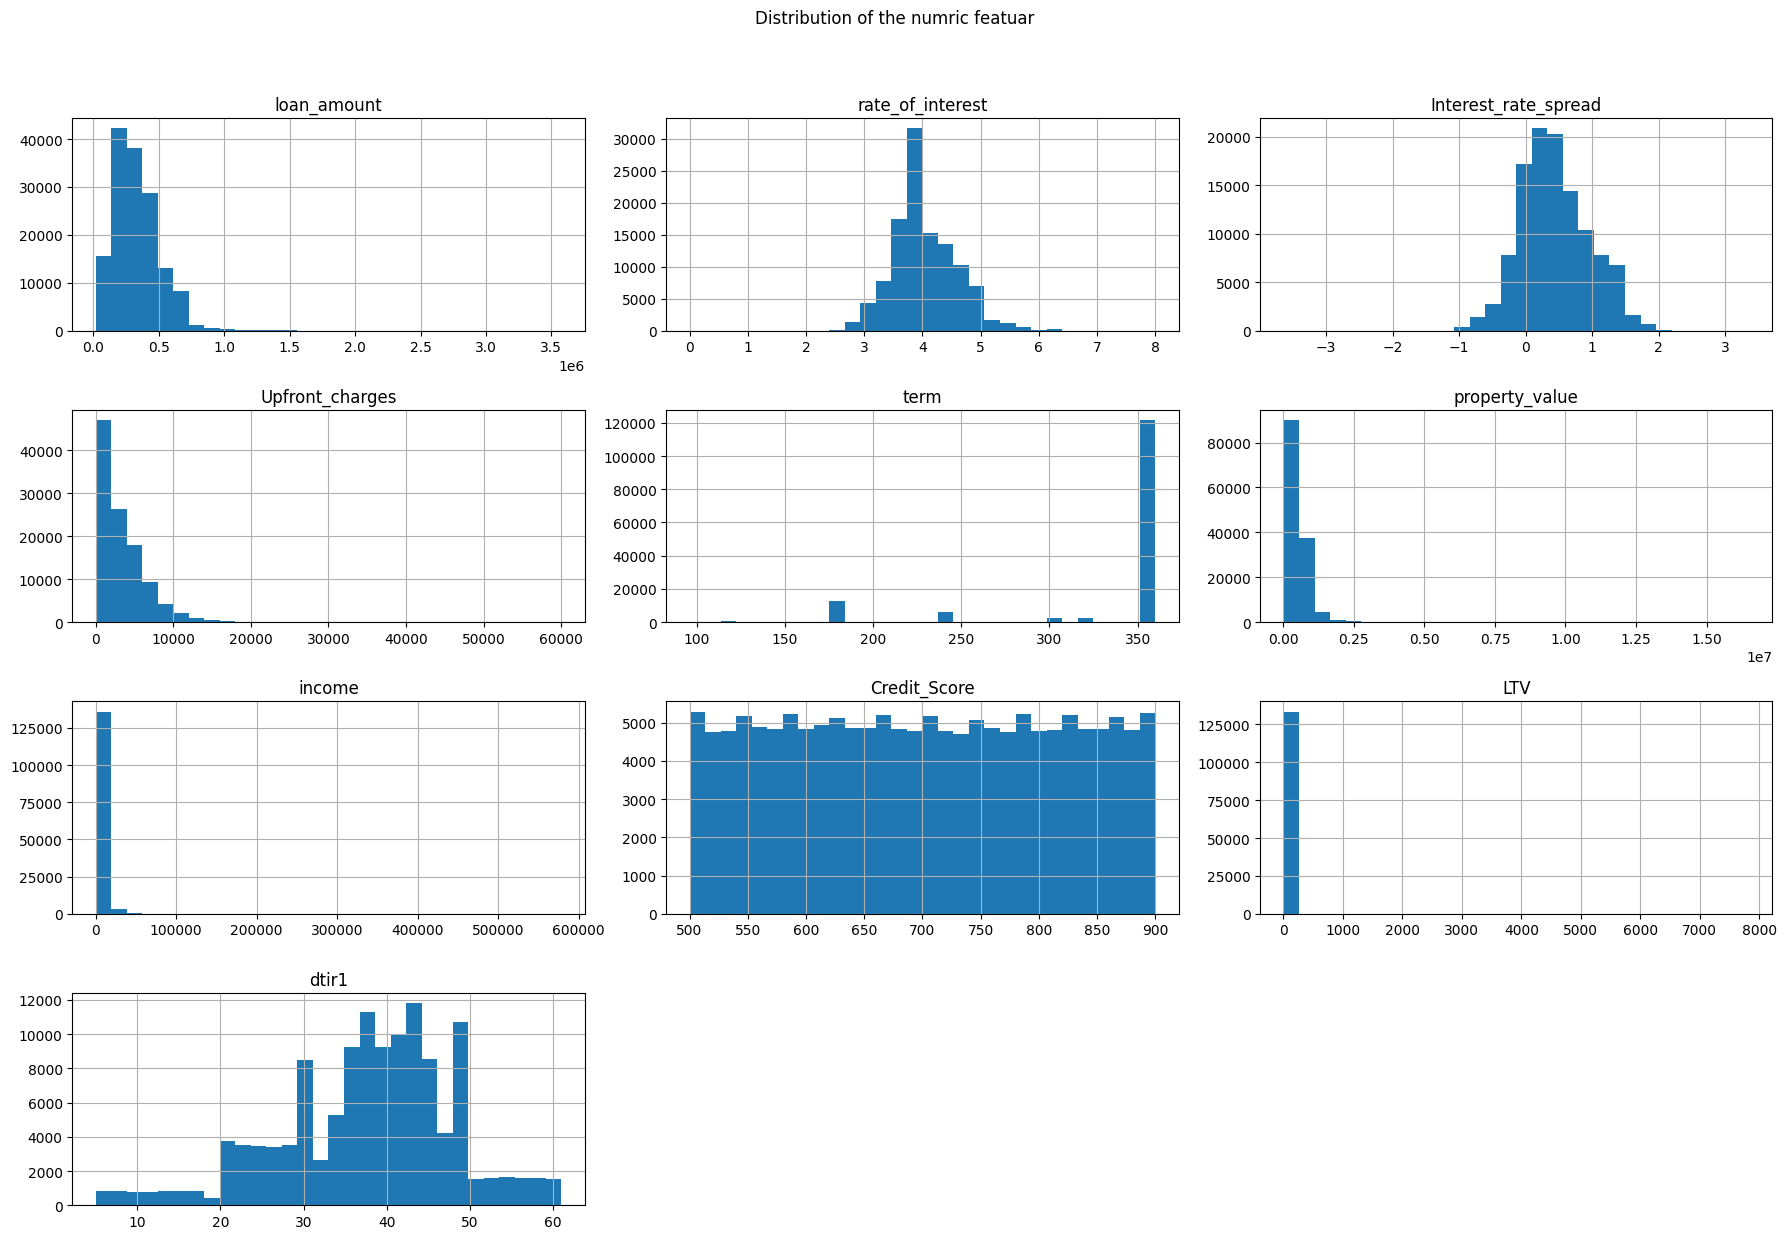

In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude = ['ID', 'year', 'Status']
plot_cols = [col for col in numeric_cols if col not in cols_to_exclude]
df[plot_cols].hist(bins=30, figsize=(18, 13))
plt.suptitle("Distribution of the numric featuar")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

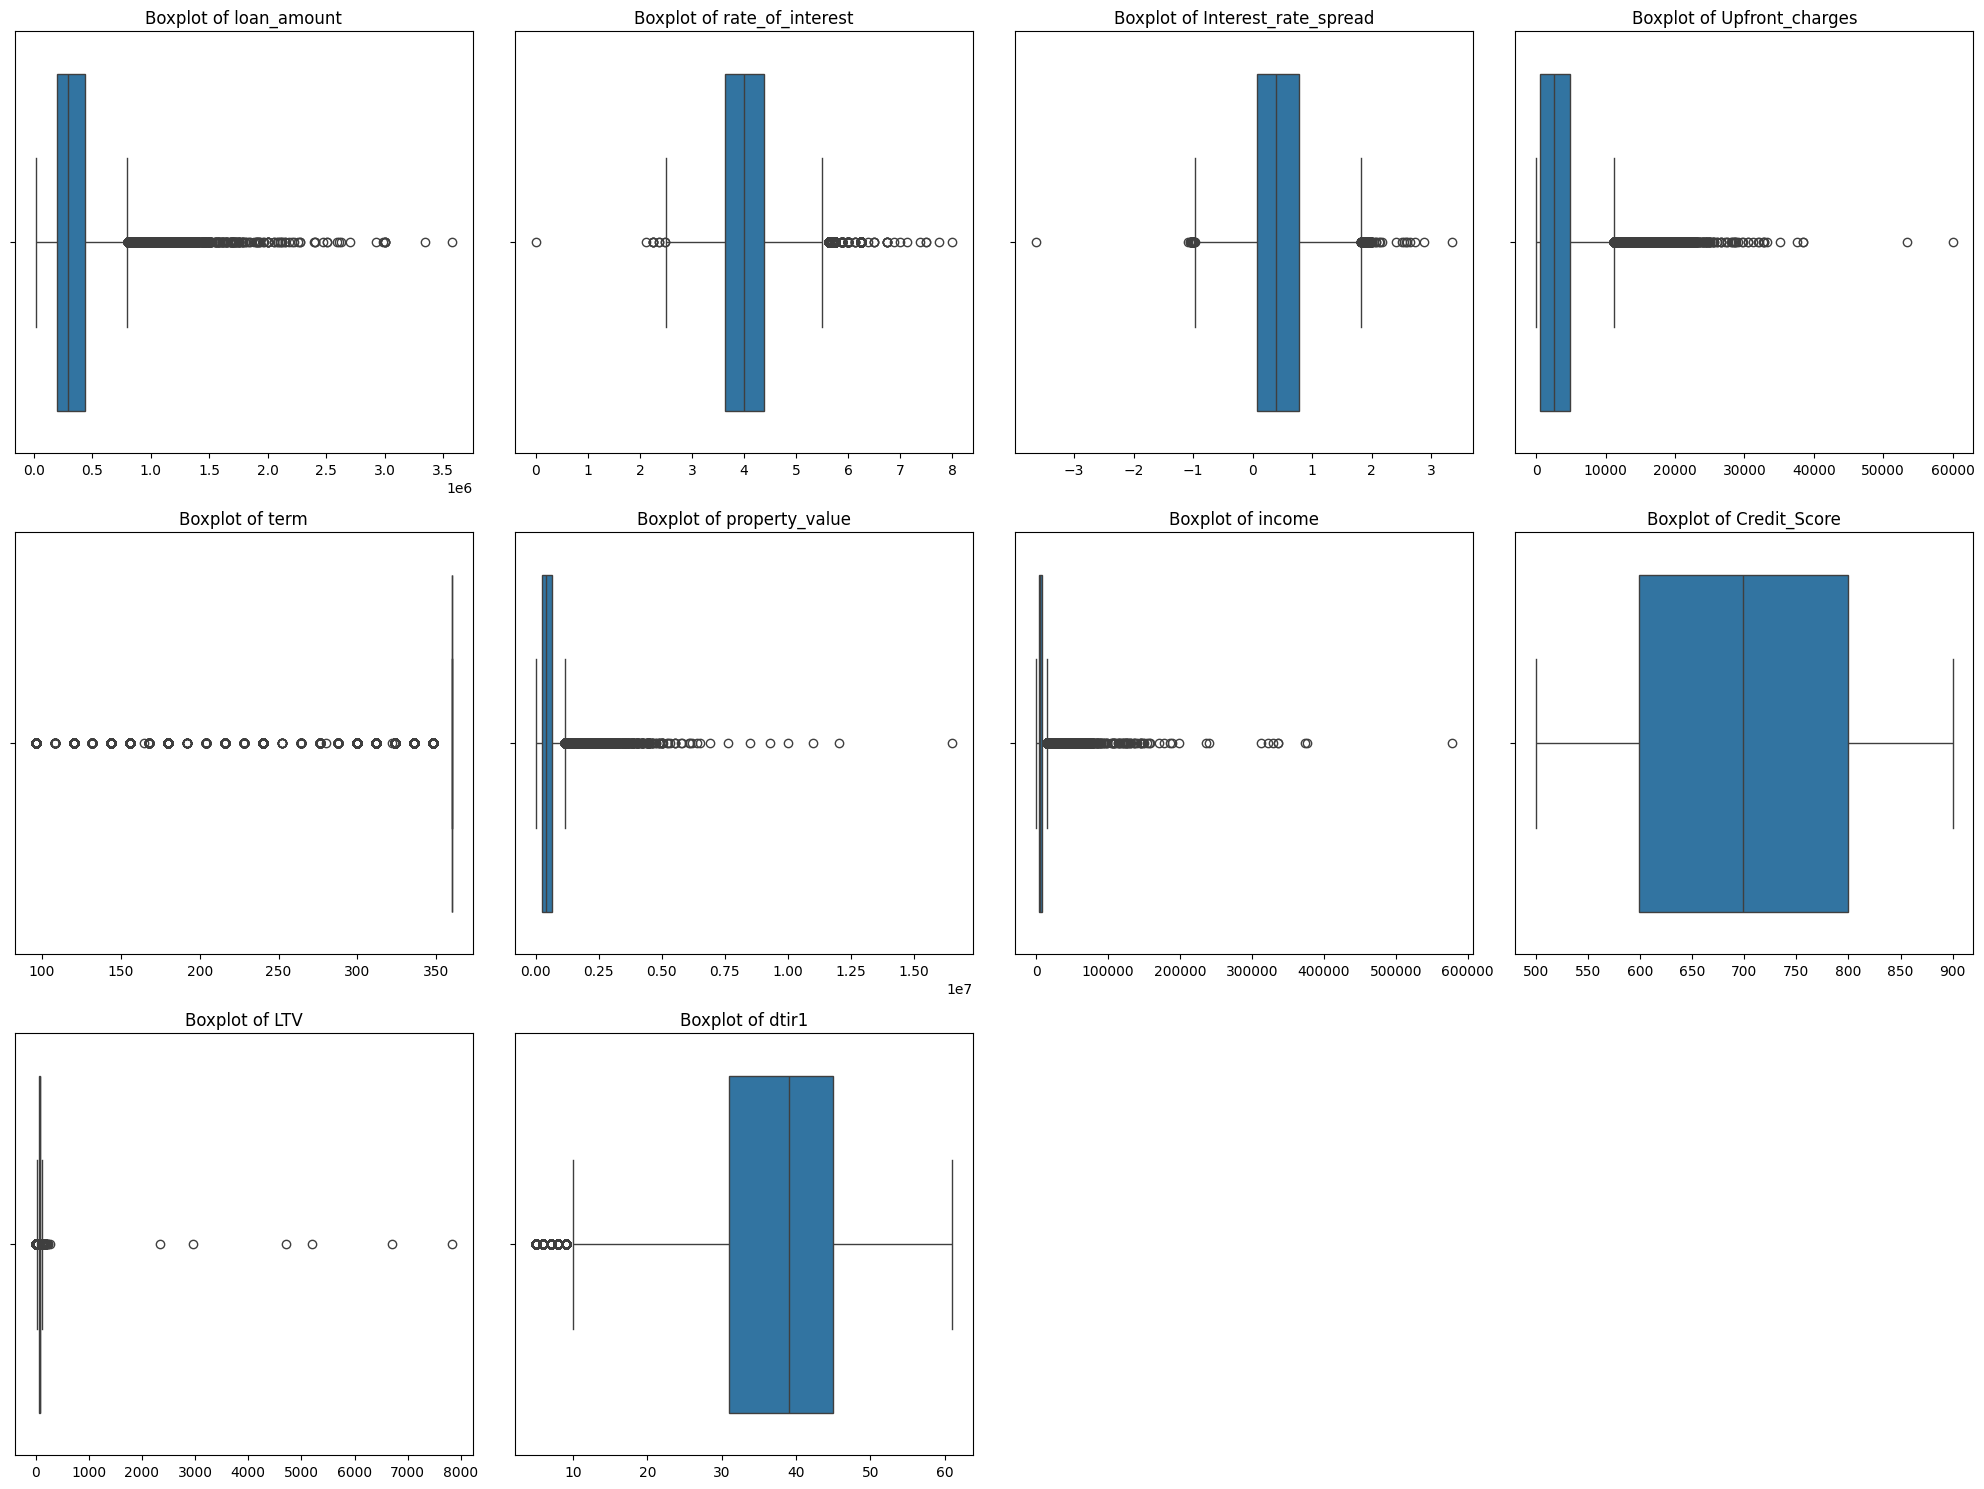

In [ ]:
rows = (len(plot_cols) + 3) // 4
fig, axes = plt.subplots(rows, 4, figsize=(20, rows * 5))
axes = axes.flatten()

for i, col in enumerate(plot_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel("")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import pointbiserialr
import numpy as np

for col in numeric_cols:
    valid_data = df[[col, 'Status']].dropna()
    if not valid_data.empty:
        corr, p_value = pointbiserialr(valid_data['Status'], valid_data[col])
        if isinstance(corr, np.ndarray) or isinstance(p_value, np.ndarray) or np.isnan(corr) or np.isnan(p_value):
            print(f"{col}: correlation or p-value is not a valid number.")
        else:
            print(f"{col}: correlation = {corr:.3f}, p-value = {p_value:.3e}")
    else:
        print(f"{col}: No valid data for correlation.")


ID: correlation = 0.002, p-value = 5.114e-01
year: correlation or p-value is not a valid number.
loan_amount: correlation = -0.037, p-value = 8.691e-46
rate_of_interest: correlation = 0.023, p-value = 1.451e-14
Interest_rate_spread: correlation or p-value is not a valid number.
Upfront_charges: correlation = -0.019, p-value = 2.620e-10
term: correlation = -0.000, p-value = 9.263e-01
property_value: correlation = -0.049, p-value = 2.052e-71
income: correlation = -0.065, p-value = 5.925e-131
Credit_Score: correlation = 0.004, p-value = 1.227e-01
LTV: correlation = 0.039, p-value = 6.829e-46
Status: correlation or p-value is not a valid number.
dtir1: correlation = 0.078, p-value = 1.158e-167


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:5405: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rpb, prob = pearsonr(x, y)


✅ ما الذي نستنتجه؟
كل معاملات الارتباط ضعيفة (< 0.1)، مما يعني أنه لا يوجد متغير رقمي واحد قوي في التنبؤ بـ Status بمفرده.

لكن كثير منها دال إحصائيًا (p < 0.05)، خاصة income, loan_amount, dtir1, property_value.

بعض المتغيرات لا معنى لاستخدامها في النمذجة مثل ID, year, term.

✳️ التوصيات:
احفظ المتغيرات الرقمية الدالة إحصائيًا، حتى لو الارتباط ضعيف، لأن النموذج قد يستفيد منها معًا.

احذف أو تجاهل المتغيرات غير الدالة مثل term, Credit_Score, ID, year.



###Further Analysis of Missing Data

In [ ]:
for col in ['Interest_rate_spread', 'rate_of_interest', 'Upfront_charges', 'property_value_log', 'LTV', 'dtir1']:
    missing_by_status = df[df[col].isnull()]['Status'].value_counts(normalize=True)
    print(f"{col} missing breakdown:\n{missing_by_status}\n")

ID missing breakdown:
Series([], Name: proportion, dtype: float64)

year missing breakdown:
Series([], Name: proportion, dtype: float64)

loan_limit missing breakdown:
Status
0    0.736543
1    0.263457
Name: proportion, dtype: float64

Gender missing breakdown:
Series([], Name: proportion, dtype: float64)

approv_in_adv missing breakdown:
Status
0    0.734581
1    0.265419
Name: proportion, dtype: float64

loan_type missing breakdown:
Series([], Name: proportion, dtype: float64)

loan_purpose missing breakdown:
Status
0    0.738806
1    0.261194
Name: proportion, dtype: float64

Credit_Worthiness missing breakdown:
Series([], Name: proportion, dtype: float64)

open_credit missing breakdown:
Series([], Name: proportion, dtype: float64)

business_or_commercial missing breakdown:
Series([], Name: proportion, dtype: float64)

loan_amount missing breakdown:
Series([], Name: proportion, dtype: float64)

rate_of_interest missing breakdown:
Status
1    1.0
Name: proportion, dtype: float64

In

<Axes: xlabel='age_is_missing', ylabel='count'>

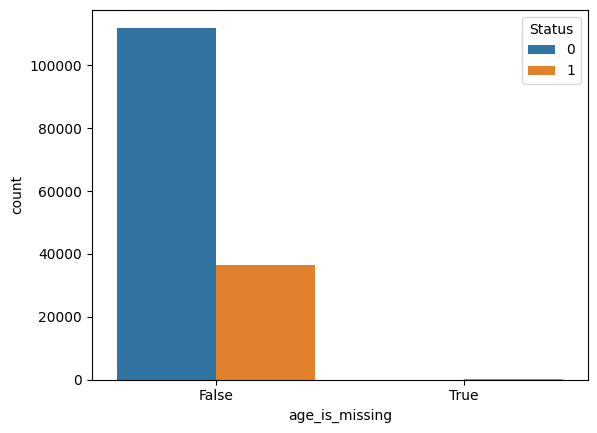

In [ ]:
df['age_is_missing'] = df['age'].isnull()
sns.countplot(x='age_is_missing', hue='Status', data=df)


In [27]:
# from scipy.stats import chi2_contingency

# for col in categorical_cols:
#     if df[col].nunique() < 30:
#         contingency = pd.crosstab(df[col], df['age'])
#         chi2, p, dof, ex = chi2_contingency(contingency)
#         print(f"{col}: Chi2 = {chi2:.2f}, p = {p:.4f}")


##Univariate Analysis - Categorical Data

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("عدد المتغيرات الفئوية:", len(categorical_cols))
categorical_cols


عدد المتغيرات الفئوية: 21


['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

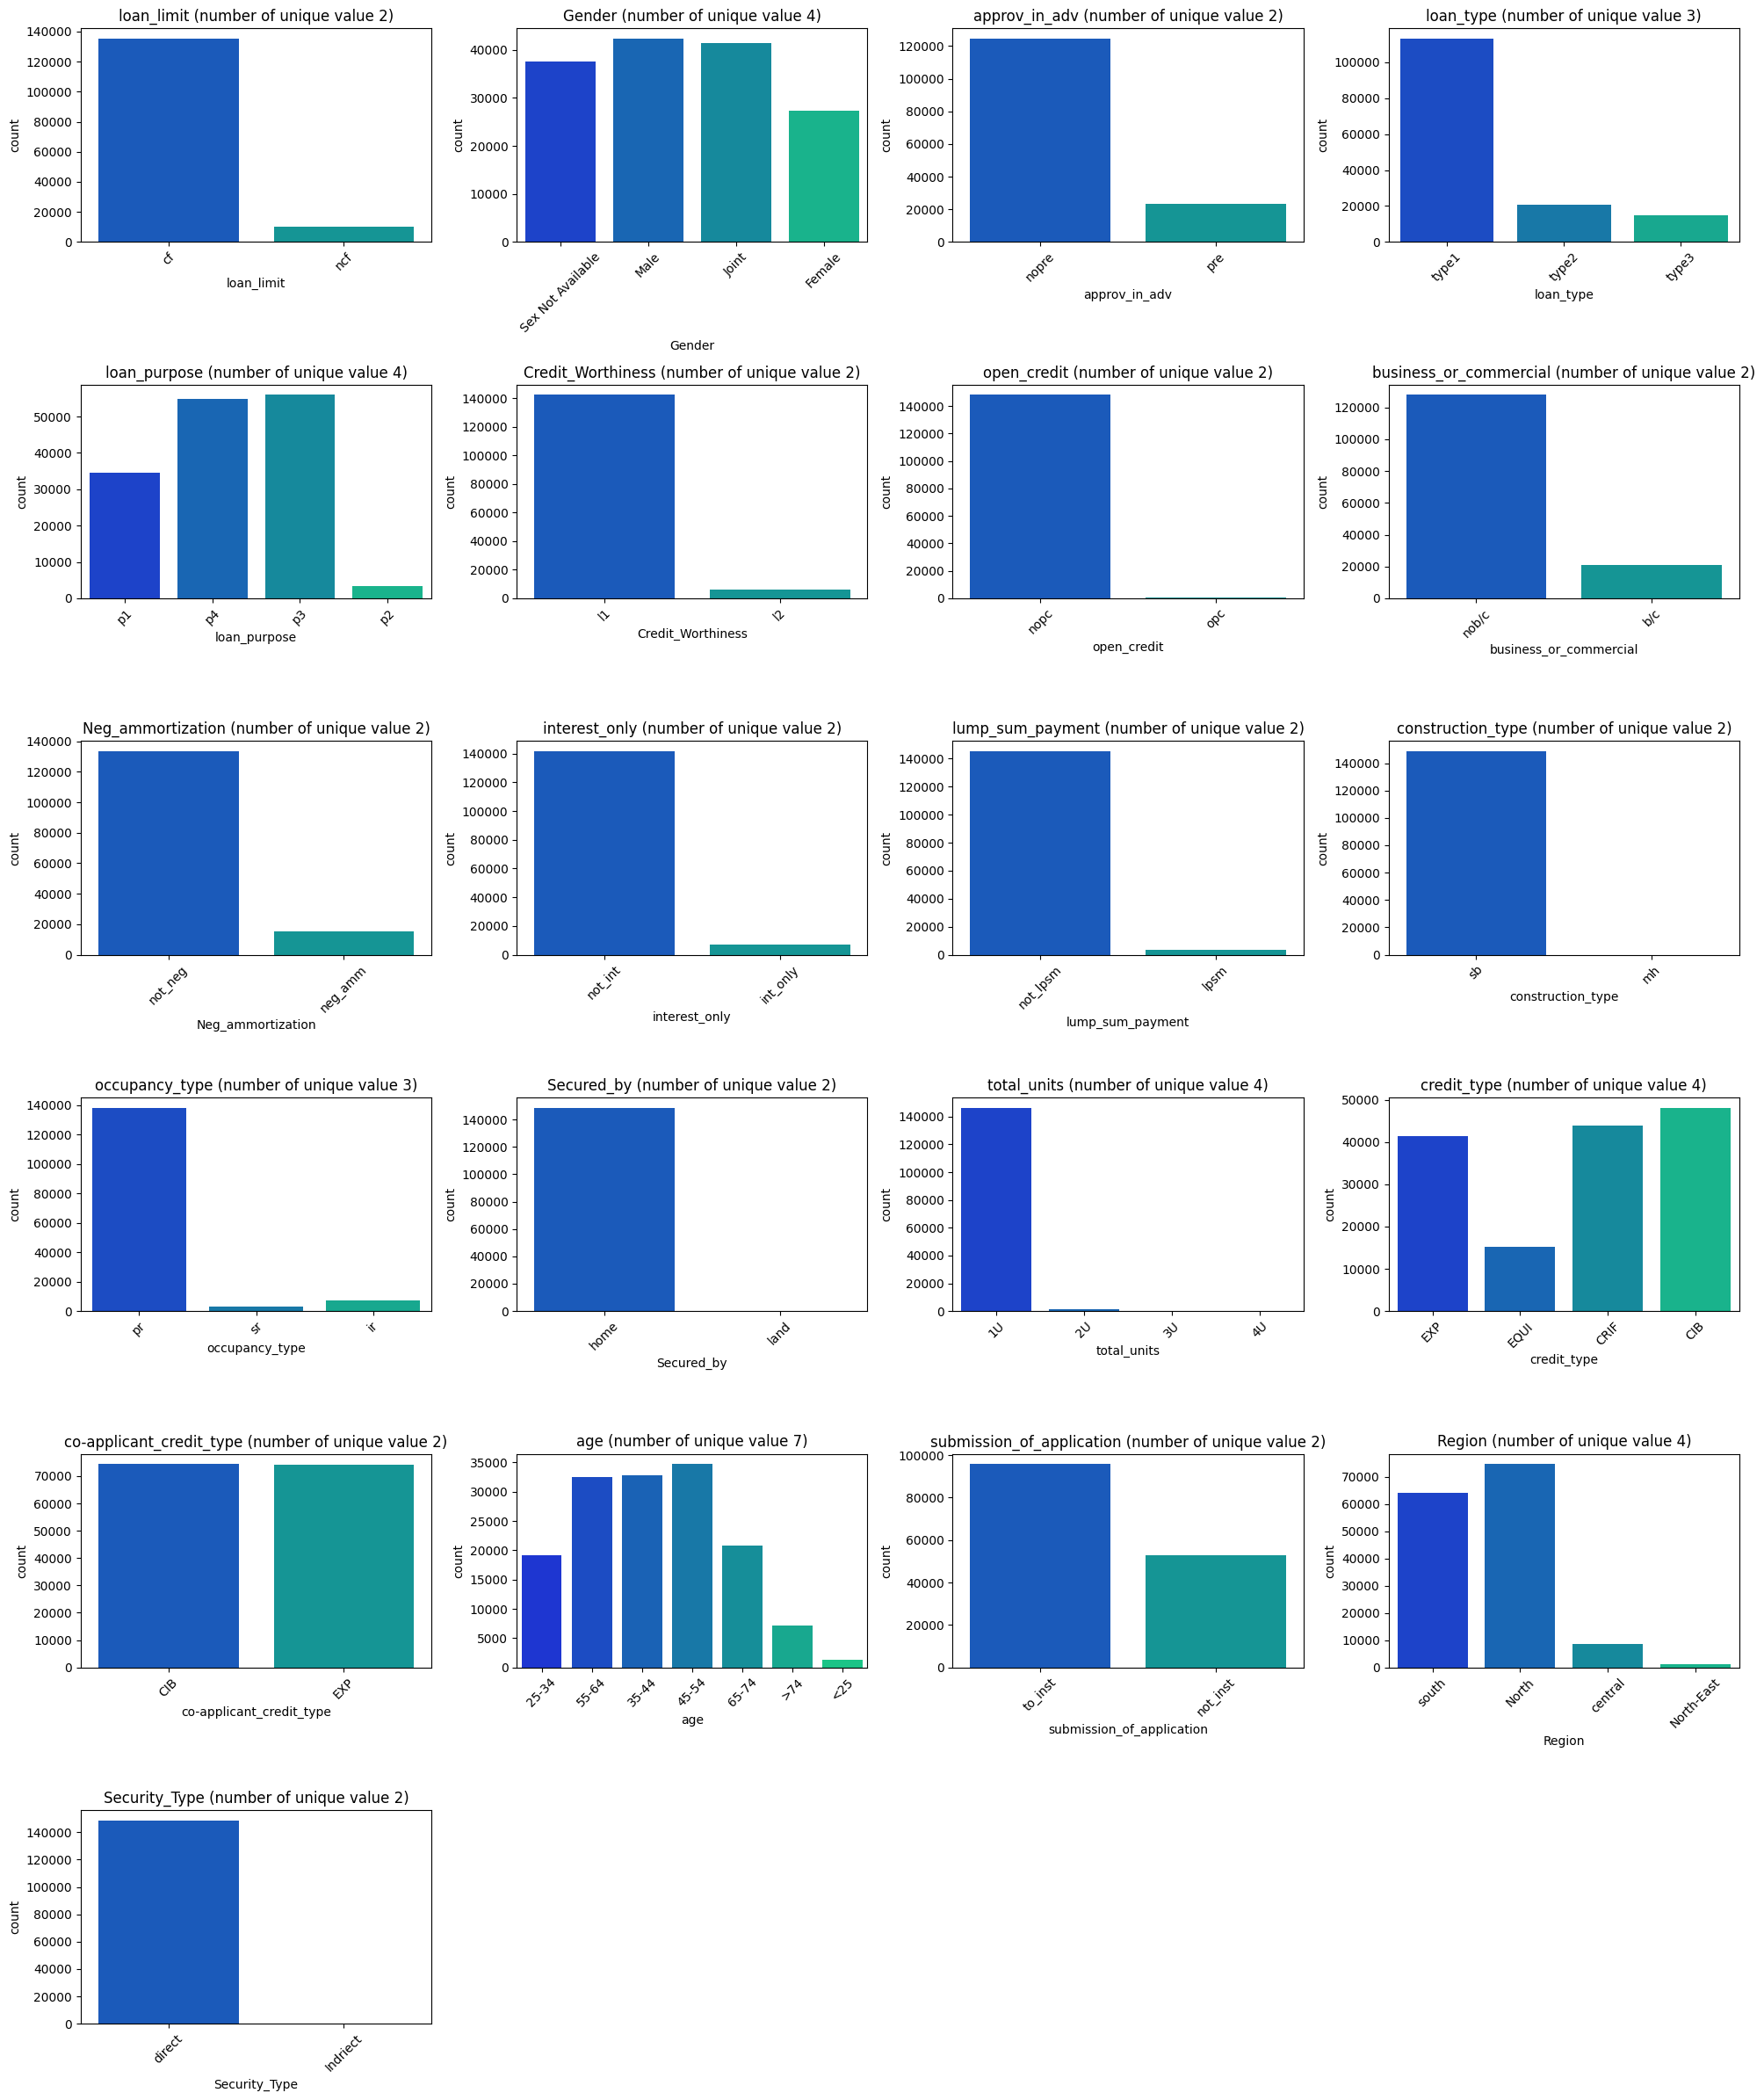

In [ ]:
num_cols = len(categorical_cols)

n_cols = 4
n_rows = (num_cols + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, ax=axes[i],palette='winter')
    axes[i].set_title(f"{col} (number of unique value {df[col].nunique()})")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
rare_threshold = 0.01
for col in categorical_cols:
    freqs = df[col].value_counts(normalize=True)
    rare_categories = freqs[freqs < rare_threshold]
    if not rare_categories.empty:
        print(f"\n {col} يحتوي على قيم نادرة:")
        print(rare_categories)



 open_credit يحتوي على قيم نادرة:
open_credit
opc    0.00374
Name: proportion, dtype: float64

 construction_type يحتوي على قيم نادرة:
construction_type
mh    0.000222
Name: proportion, dtype: float64

 Secured_by يحتوي على قيم نادرة:
Secured_by
land    0.000222
Name: proportion, dtype: float64

 total_units يحتوي على قيم نادرة:
total_units
2U    0.009935
3U    0.002643
4U    0.002152
Name: proportion, dtype: float64

 age يحتوي على قيم نادرة:
age
<25    0.009005
Name: proportion, dtype: float64

 Region يحتوي على قيم نادرة:
Region
North-East    0.008307
Name: proportion, dtype: float64

 Security_Type يحتوي على قيم نادرة:
Security_Type
Indriect    0.000222
Name: proportion, dtype: float64


##Bivariate Analysis

,loan_amount,rate_of_interest
loan_amount,1.000000,-0.150844
rate_of_interest,-0.150844,1.000000


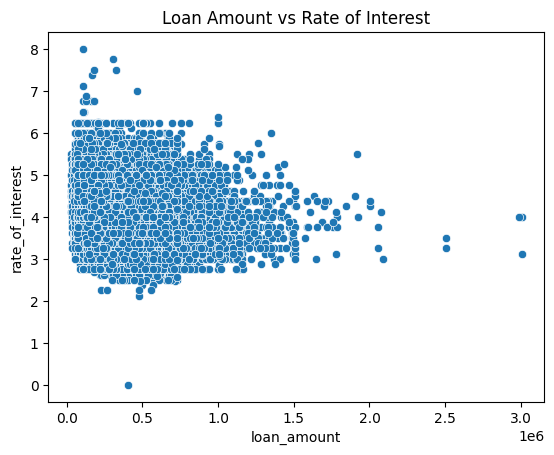

In [ ]:
sns.scatterplot(data=df, x='loan_amount', y='rate_of_interest')
plt.title('Loan Amount vs Rate of Interest')
df[['loan_amount', 'rate_of_interest']].corr()


<Axes: xlabel='property_value', ylabel='loan_amount'>

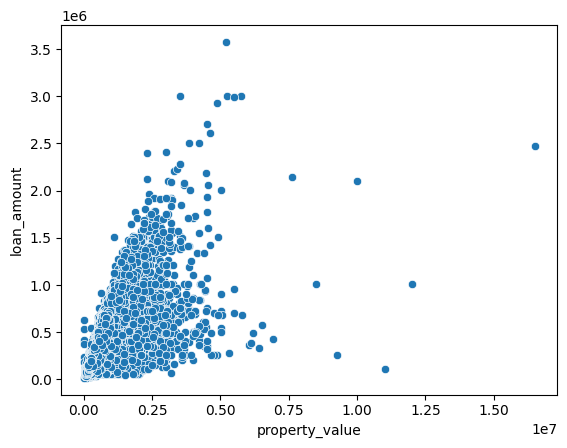

In [ ]:
sns.scatterplot(data=df, x='property_value', y='loan_amount')


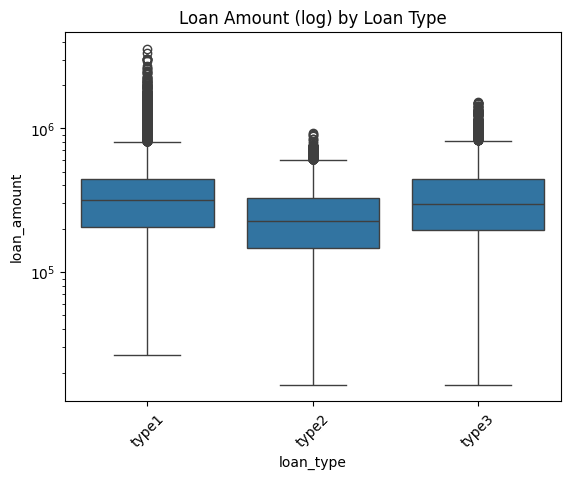

In [ ]:
sns.boxplot(data=df, x='loan_type', y='loan_amount')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title("Loan Amount (log) by Loan Type")
plt.show()


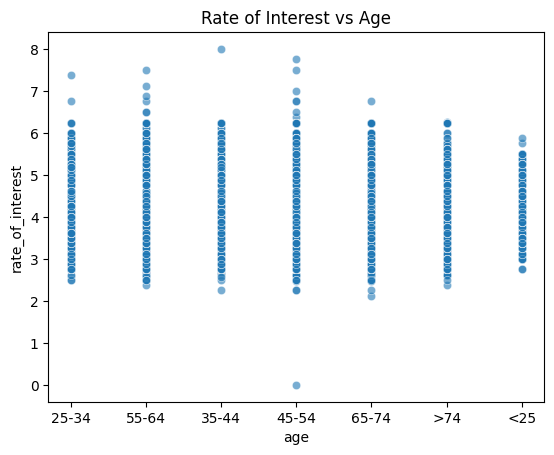

In [21]:
sns.scatterplot(data=df, x='age', y='rate_of_interest', alpha=0.6)
plt.title('Rate of Interest vs Age')
plt.show()

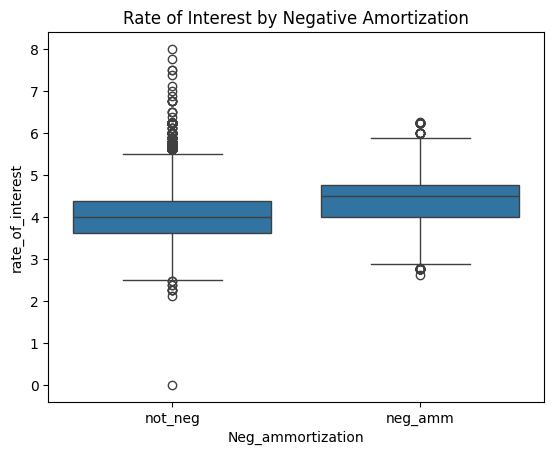

In [7]:

sns.boxplot(data=df, x='Neg_ammortization', y='rate_of_interest')
plt.title('Rate of Interest by Negative Amortization')
plt.show()

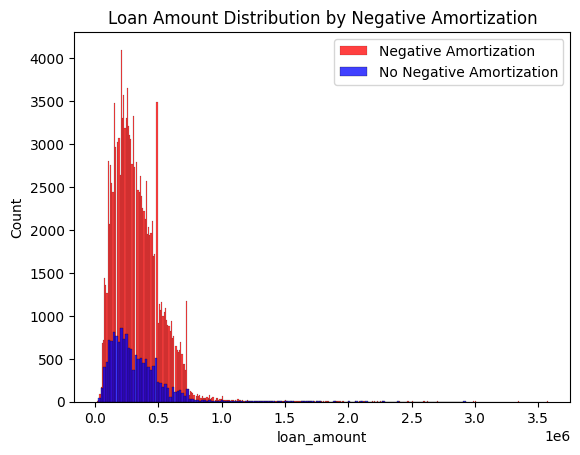

In [12]:
# رسم histogram لمبلغ القرض بناءً على Neg_ammortization
sns.histplot(data=df[df['Neg_ammortization'] == "not_neg"], x='loan_amount', color='red', label='Negative Amortization')
sns.histplot(data=df[df['Neg_ammortization'] == "neg_amm"], x='loan_amount', color='blue', label='No Negative Amortization')
plt.legend()
plt.title('Loan Amount Distribution by Negative Amortization')
plt.show()

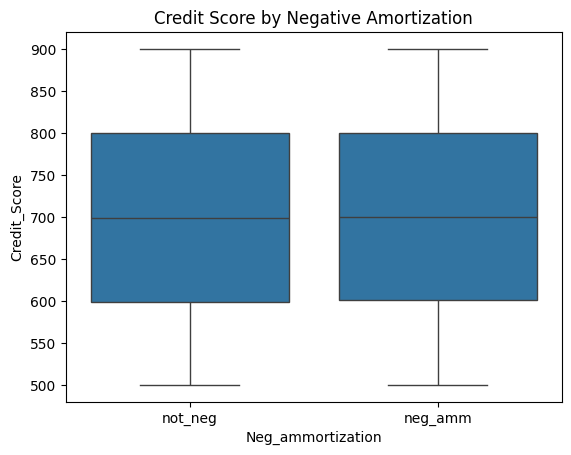

In [13]:
# رسم boxplot للجدارة الائتمانية بناءً على Neg_ammortization
sns.boxplot(data=df, x='Neg_ammortization', y='Credit_Score')
plt.title('Credit Score by Negative Amortization')
plt.show()

loan_type           type1  type2  type3
Neg_ammortization                      
neg_amm             11492   2337   1300
not_neg            101583  18412  13425


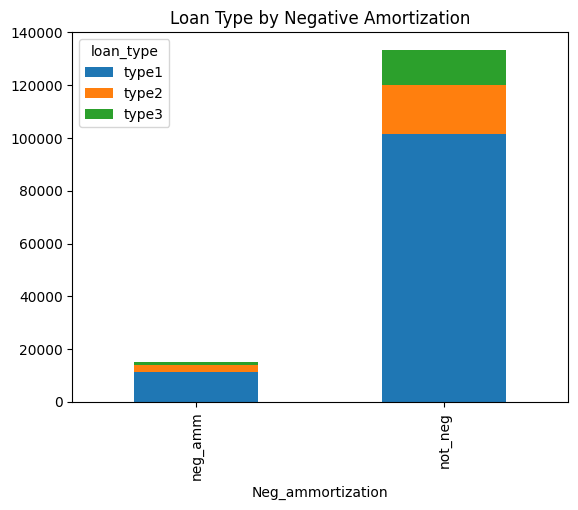

In [14]:
# تكرار نوع القرض بناءً على Neg_ammortization
loan_type_by_neg_ammortization = pd.crosstab(df['Neg_ammortization'], df['loan_type'])
print(loan_type_by_neg_ammortization)

# رسم bar chart
loan_type_by_neg_ammortization.plot(kind='bar', stacked=True)
plt.title('Loan Type by Negative Amortization')
plt.show()

Text(0.5, 1.0, 'Loan Status by age')

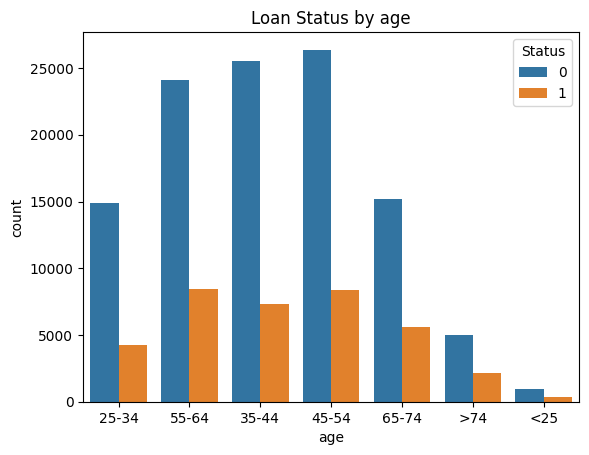

In [ ]:
sns.countplot(data=df, x='age', hue='Status')
plt.title('Loan Status by age')


Text(0.5, 1.0, 'Loan Status by Gender')

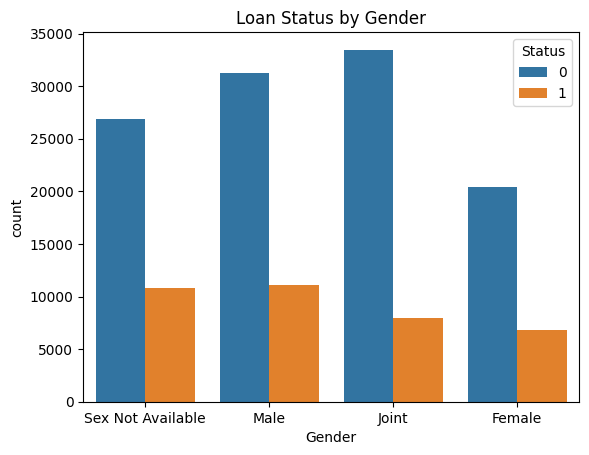

In [ ]:
sns.countplot(data=df, x='Gender', hue='Status')
plt.title('Loan Status by Gender')


Text(0.5, 1.0, 'LTV vs Loan Status (Limited Y-axis)')

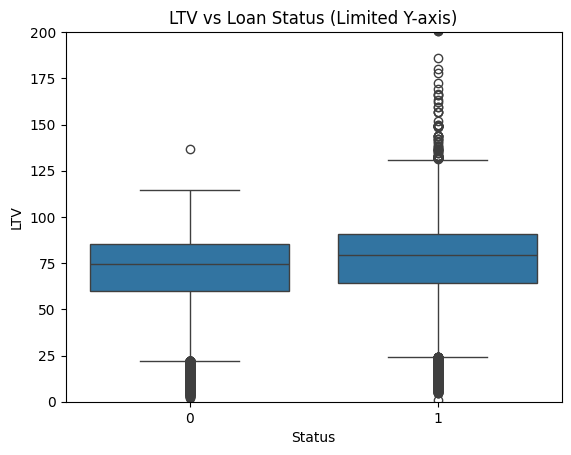

In [ ]:
sns.boxplot(data=df, x='Status', y='LTV')
plt.ylim(0, 200)  # تحديد النطاق الذي تريد عرضه
plt.title('LTV vs Loan Status (Limited Y-axis)')


<Axes: xlabel='Status', ylabel='Credit_Score'>

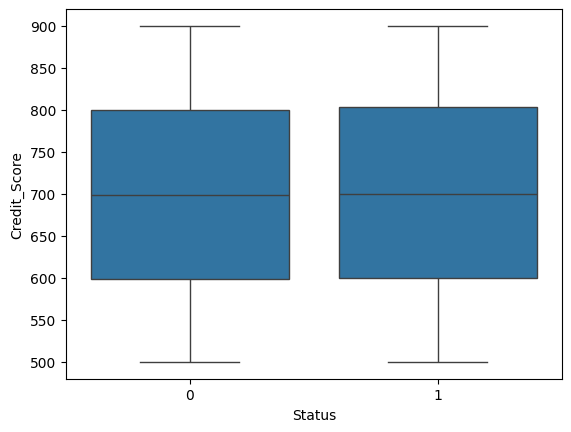

In [ ]:
sns.boxplot(data=df, x='Status', y='Credit_Score')


([0, 1, 2, 3],
 [Text(0, 0, 'p1'), Text(1, 0, 'p4'), Text(2, 0, 'p3'), Text(3, 0, 'p2')])

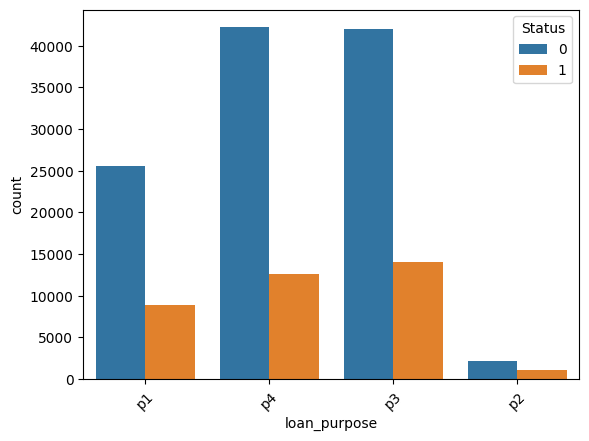

In [ ]:
sns.countplot(data=df, x='loan_purpose', hue='Status')
plt.xticks(rotation=45)


([0, 1, 2, 3],
 [Text(0, 0, 'p1'), Text(1, 0, 'p4'), Text(2, 0, 'p3'), Text(3, 0, 'p2')])

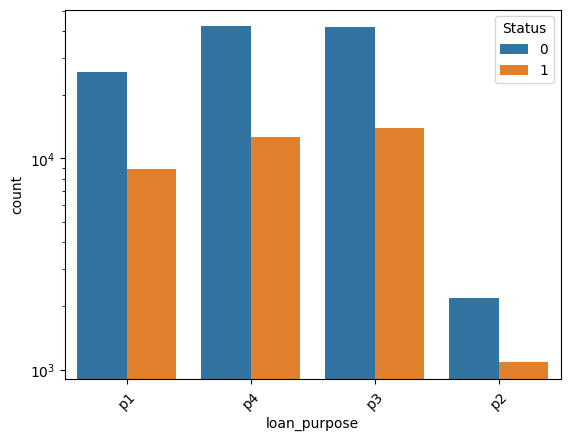

In [ ]:
d=sns.countplot(data=df, x='loan_purpose', hue='Status')
d.set(yscale="log")

plt.xticks(rotation=45)


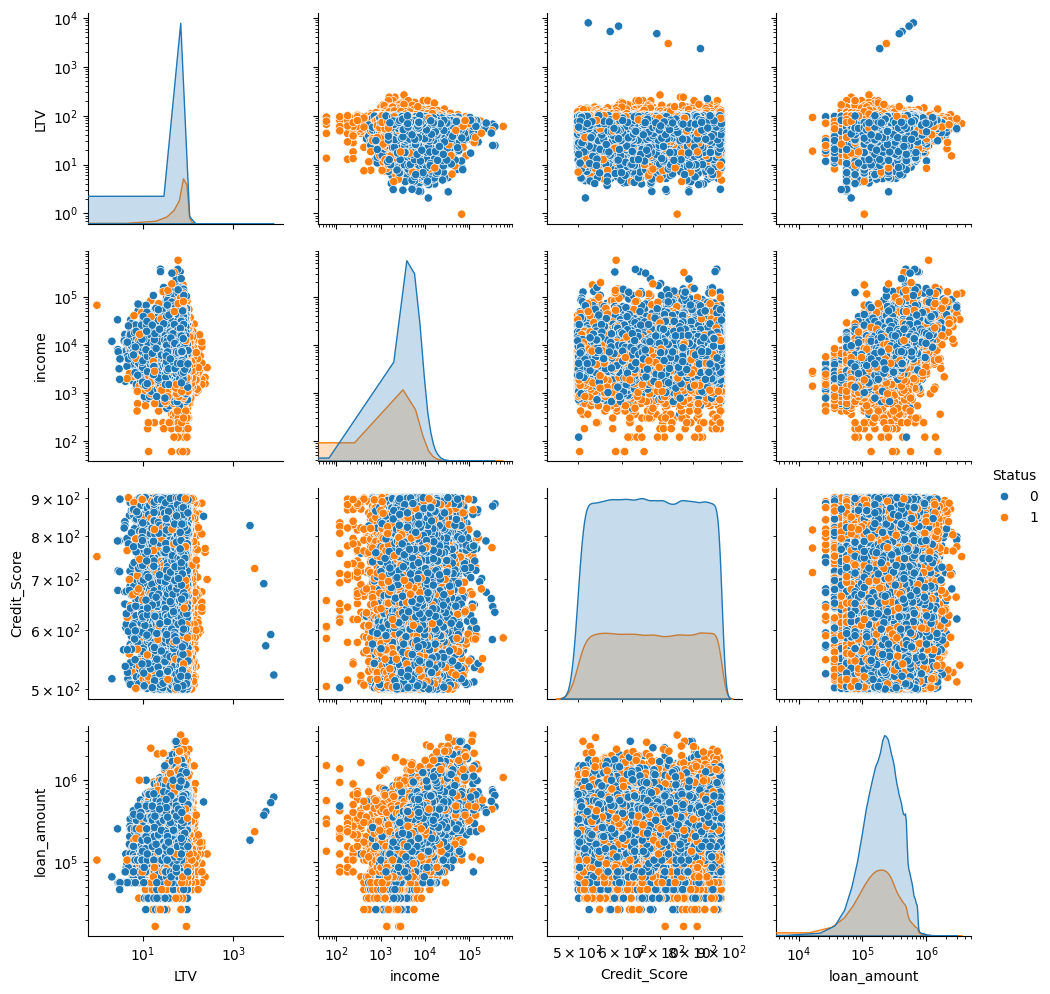

In [ ]:
g = sns.pairplot(
    data=df,
    vars=['LTV', 'income', 'Credit_Score', 'loan_amount'],
    hue='Status'
)

for ax in g.axes.flat:
    ax.set(xscale="log", yscale="log")

plt.show()

##Multivariate Analysis

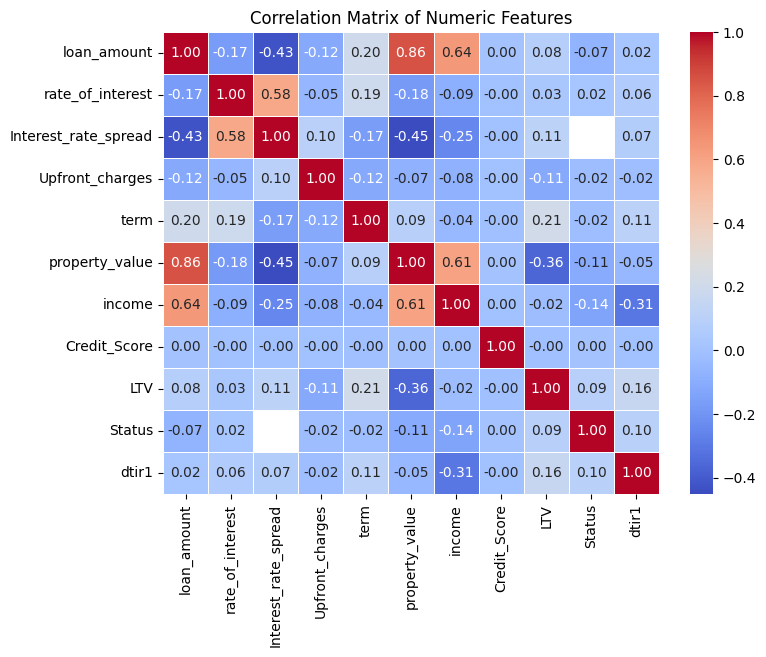

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
cols_to_exclude_corr = ['ID', 'year']
numeric_df_corr = numeric_df.drop(columns=cols_to_exclude_corr, errors='ignore')

correlation_matrix = numeric_df_corr.corr(method='spearman')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


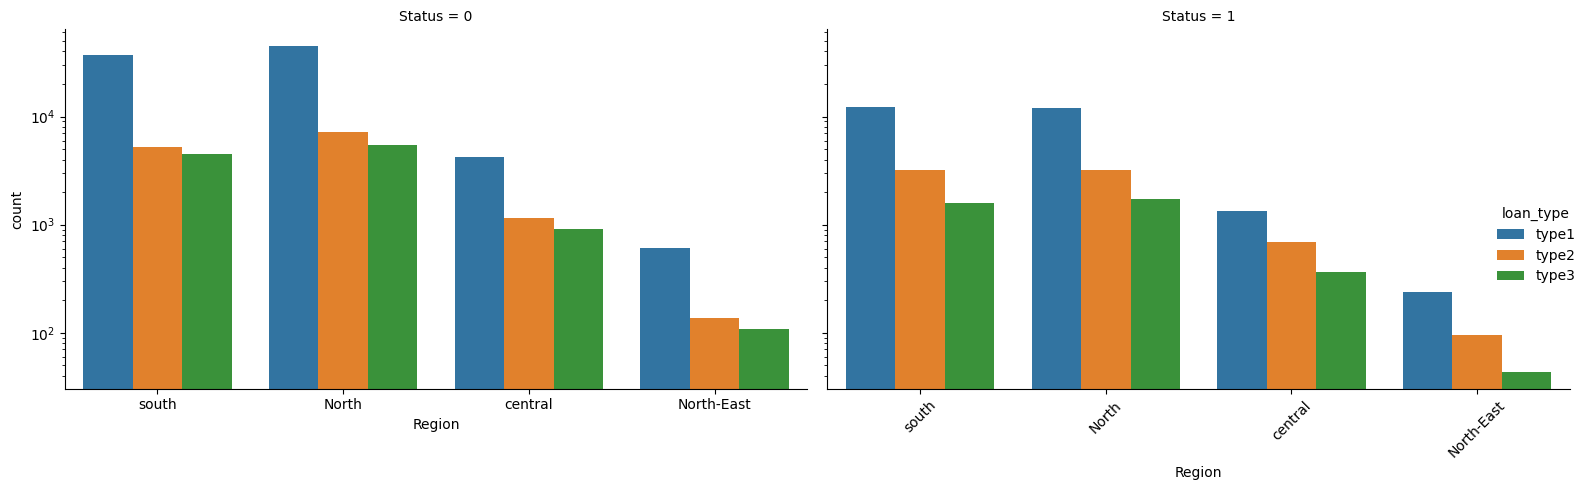

In [ ]:
g = sns.catplot(
    data=df, x='Region', hue='loan_type', col='Status',
    kind='count', height=5, aspect=1.5
)

g.set(yscale="log")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

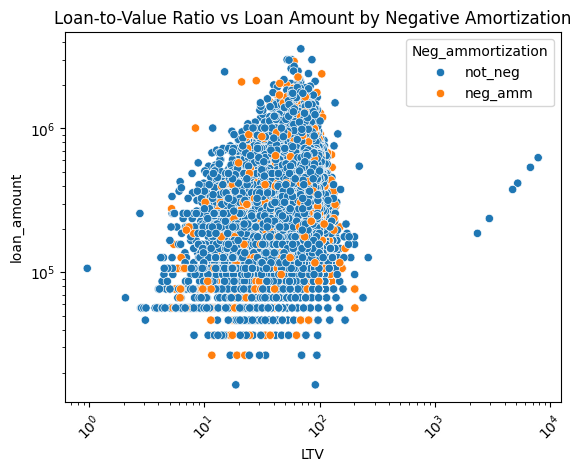

In [20]:
# رسم scatter plot لنسبة القرض إلى قيمة العقار بناءً على Neg_ammortization
h=sns.scatterplot(data=df, x='LTV', y='loan_amount', hue='Neg_ammortization')
plt.title('Loan-to-Value Ratio vs Loan Amount by Negative Amortization')

h.set(xscale="log")
h.set(yscale="log")
plt.xticks(rotation=45)
plt.show()

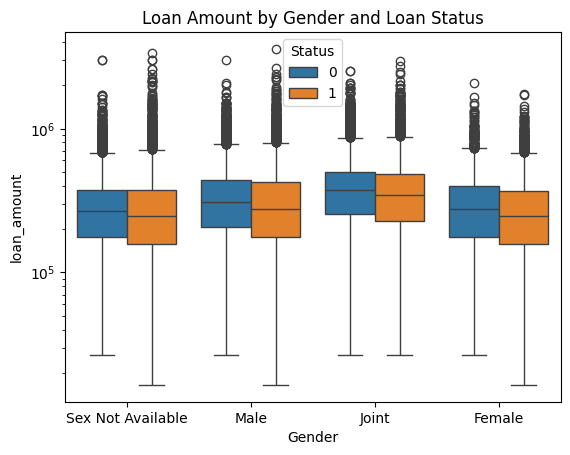

In [ ]:
sns.boxplot(data=df, x='Gender', y='loan_amount', hue='Status')
plt.title('Loan Amount by Gender and Loan Status')
plt.yscale('log')
plt.show()


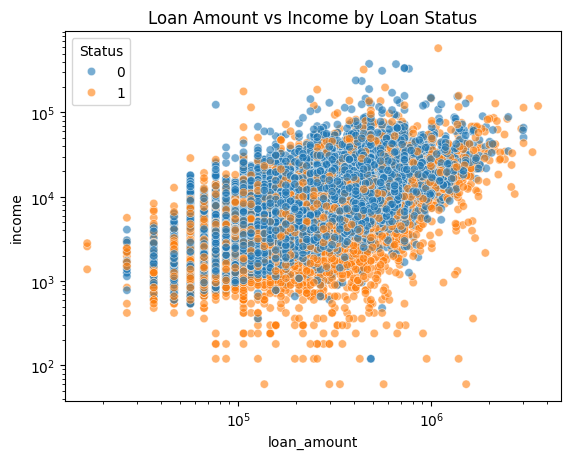

In [ ]:
sns.scatterplot(data=df, x='loan_amount', y='income', hue='Status', alpha=0.6)
plt.title('Loan Amount vs Income by Loan Status')
plt.xscale('log')
plt.yscale('log')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    if df[col].nunique() < 30:
        contingency = pd.crosstab(df[col], df['Status'])
        chi2, p, dof, ex = chi2_contingency(contingency)
        print(f"{col}: Chi2 = {chi2:.2f}, p = {p:.4f}")


loan_limit: Chi2 = 427.40, p = 0.0000
Gender: Chi2 = 1043.60, p = 0.0000
approv_in_adv: Chi2 = 206.40, p = 0.0000
loan_type: Chi2 = 1309.96, p = 0.0000
loan_purpose: Chi2 = 240.21, p = 0.0000
Credit_Worthiness: Chi2 = 180.42, p = 0.0000
open_credit: Chi2 = 14.43, p = 0.0001
business_or_commercial: Chi2 = 1272.81, p = 0.0000
Neg_ammortization: Chi2 = 3610.21, p = 0.0000
interest_only: Chi2 = 28.49, p = 0.0000
lump_sum_payment: Chi2 = 5237.83, p = 0.0000
construction_type: Chi2 = 96.91, p = 0.0000
occupancy_type: Chi2 = 131.83, p = 0.0000
Secured_by: Chi2 = 96.91, p = 0.0000
total_units: Chi2 = 123.99, p = 0.0000
credit_type: Chi2 = 52135.28, p = 0.0000
co-applicant_credit_type: Chi2 = 3092.39, p = 0.0000
age: Chi2 = 374.50, p = 0.0000
submission_of_application: Chi2 = 2171.71, p = 0.0000
Region: Chi2 = 380.46, p = 0.0000
Security_Type: Chi2 = 96.91, p = 0.0000


#preprossing & handeling missing value

##Treating outliear

In [42]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# # حساب الحدود الدنيا والعليا (1% و 99%)
# lower = df['dtir1'].quantile(0.02)
# upper = df['dtir1'].quantile(0.99)

# # إنشاء نسخة جديدة بعد القص
# ltv_clipped = df['dtir1'].clip(lower, upper)

# # رسم Boxplot قبل وبعد القص
# plt.figure(figsize=(12, 6))

# # قبل القص
# plt.subplot(1, 2, 1)
# sns.boxplot(x=df['dtir1'])

# plt.title("Boxplot of LTV (Original)")

# # بعد القص
# plt.subplot(1, 2, 2)
# sns.boxplot(x=ltv_clipped)
# plt.title("Boxplot of LTV (Clipped at 1% and 99%)")

# plt.tight_layout()
# plt.show()
# df['dtir1'].hist(bins=30, figsize=(6, 6))
# plt.show()
# ltv_clipped.hist(bins=30, figsize=(6, 6))
# plt.show()

In [43]:
# ltv_clipped.min()

In [30]:
for col in ['loan_amount', 'Upfront_charges', 'income', 'property_value']:
    # df = df[df[col] > 0]
    df[f'{col}_log'] = np.log1p(df[col])


In [31]:
def categorize_term(term):
    if pd.isna(term):
        return np.nan
    elif term <= 180:
        return 0
    elif term < 360:
        return 1
    elif term == 360:
        return 2

df['term_cat'] = df['term'].apply(categorize_term)


In [32]:
lower_bound =df['loan_amount_log'].quantile(0.01)
upper_bound = df['loan_amount_log'].quantile(0.99)

df['loan_amount_log'] = df['loan_amount_log'].clip(lower=lower_bound, upper=upper_bound)


In [33]:
lower_bound = df['Upfront_charges_log'].quantile(0.08)
upper_bound = df['Upfront_charges_log'].quantile(0.98)

df['Upfront_charges_log'] = df['Upfront_charges_log'].clip(lower=lower_bound, upper=upper_bound)

In [34]:
lower_bound = df['income_log'].quantile(0.02)
upper_bound = df['income_log'].quantile(0.99)


df['income_log'] = df['income_log'].clip(lower=lower_bound, upper=upper_bound)


In [35]:
lower_bound = df['property_value_log'].quantile(0.01)
upper_bound = df['property_value_log'].quantile(0.99)

df['property_value_log'] = df['property_value_log'].clip(lower=lower_bound, upper=upper_bound)


In [36]:
lower_bound = df['LTV'].quantile(0.08)
upper_bound = df['LTV'].quantile(0.98)


df['LTV'] = df['LTV'].clip(lower=lower_bound, upper=upper_bound)


In [37]:
lower_bound = df['rate_of_interest'].quantile(0.01)
upper_bound = df['rate_of_interest'].quantile(0.98)

df['rate_of_interest'] = df['rate_of_interest'].clip(lower=lower_bound, upper=upper_bound)


In [38]:
lower_bound = df['Interest_rate_spread'].quantile(0.01)
upper_bound = df['Interest_rate_spread'].quantile(0.98)

df['Interest_rate_spread'] = df['Interest_rate_spread'].clip(lower=lower_bound, upper=upper_bound)


In [39]:
lower_bound = df['dtir1'].quantile(0.02)
upper_bound = df['dtir1'].quantile(0.99)

df['dtir1'] = df['dtir1'].clip(lower=lower_bound, upper=upper_bound)


In [40]:
df=df.drop(columns=['loan_amount', 'Upfront_charges', 'income', 'property_value'])

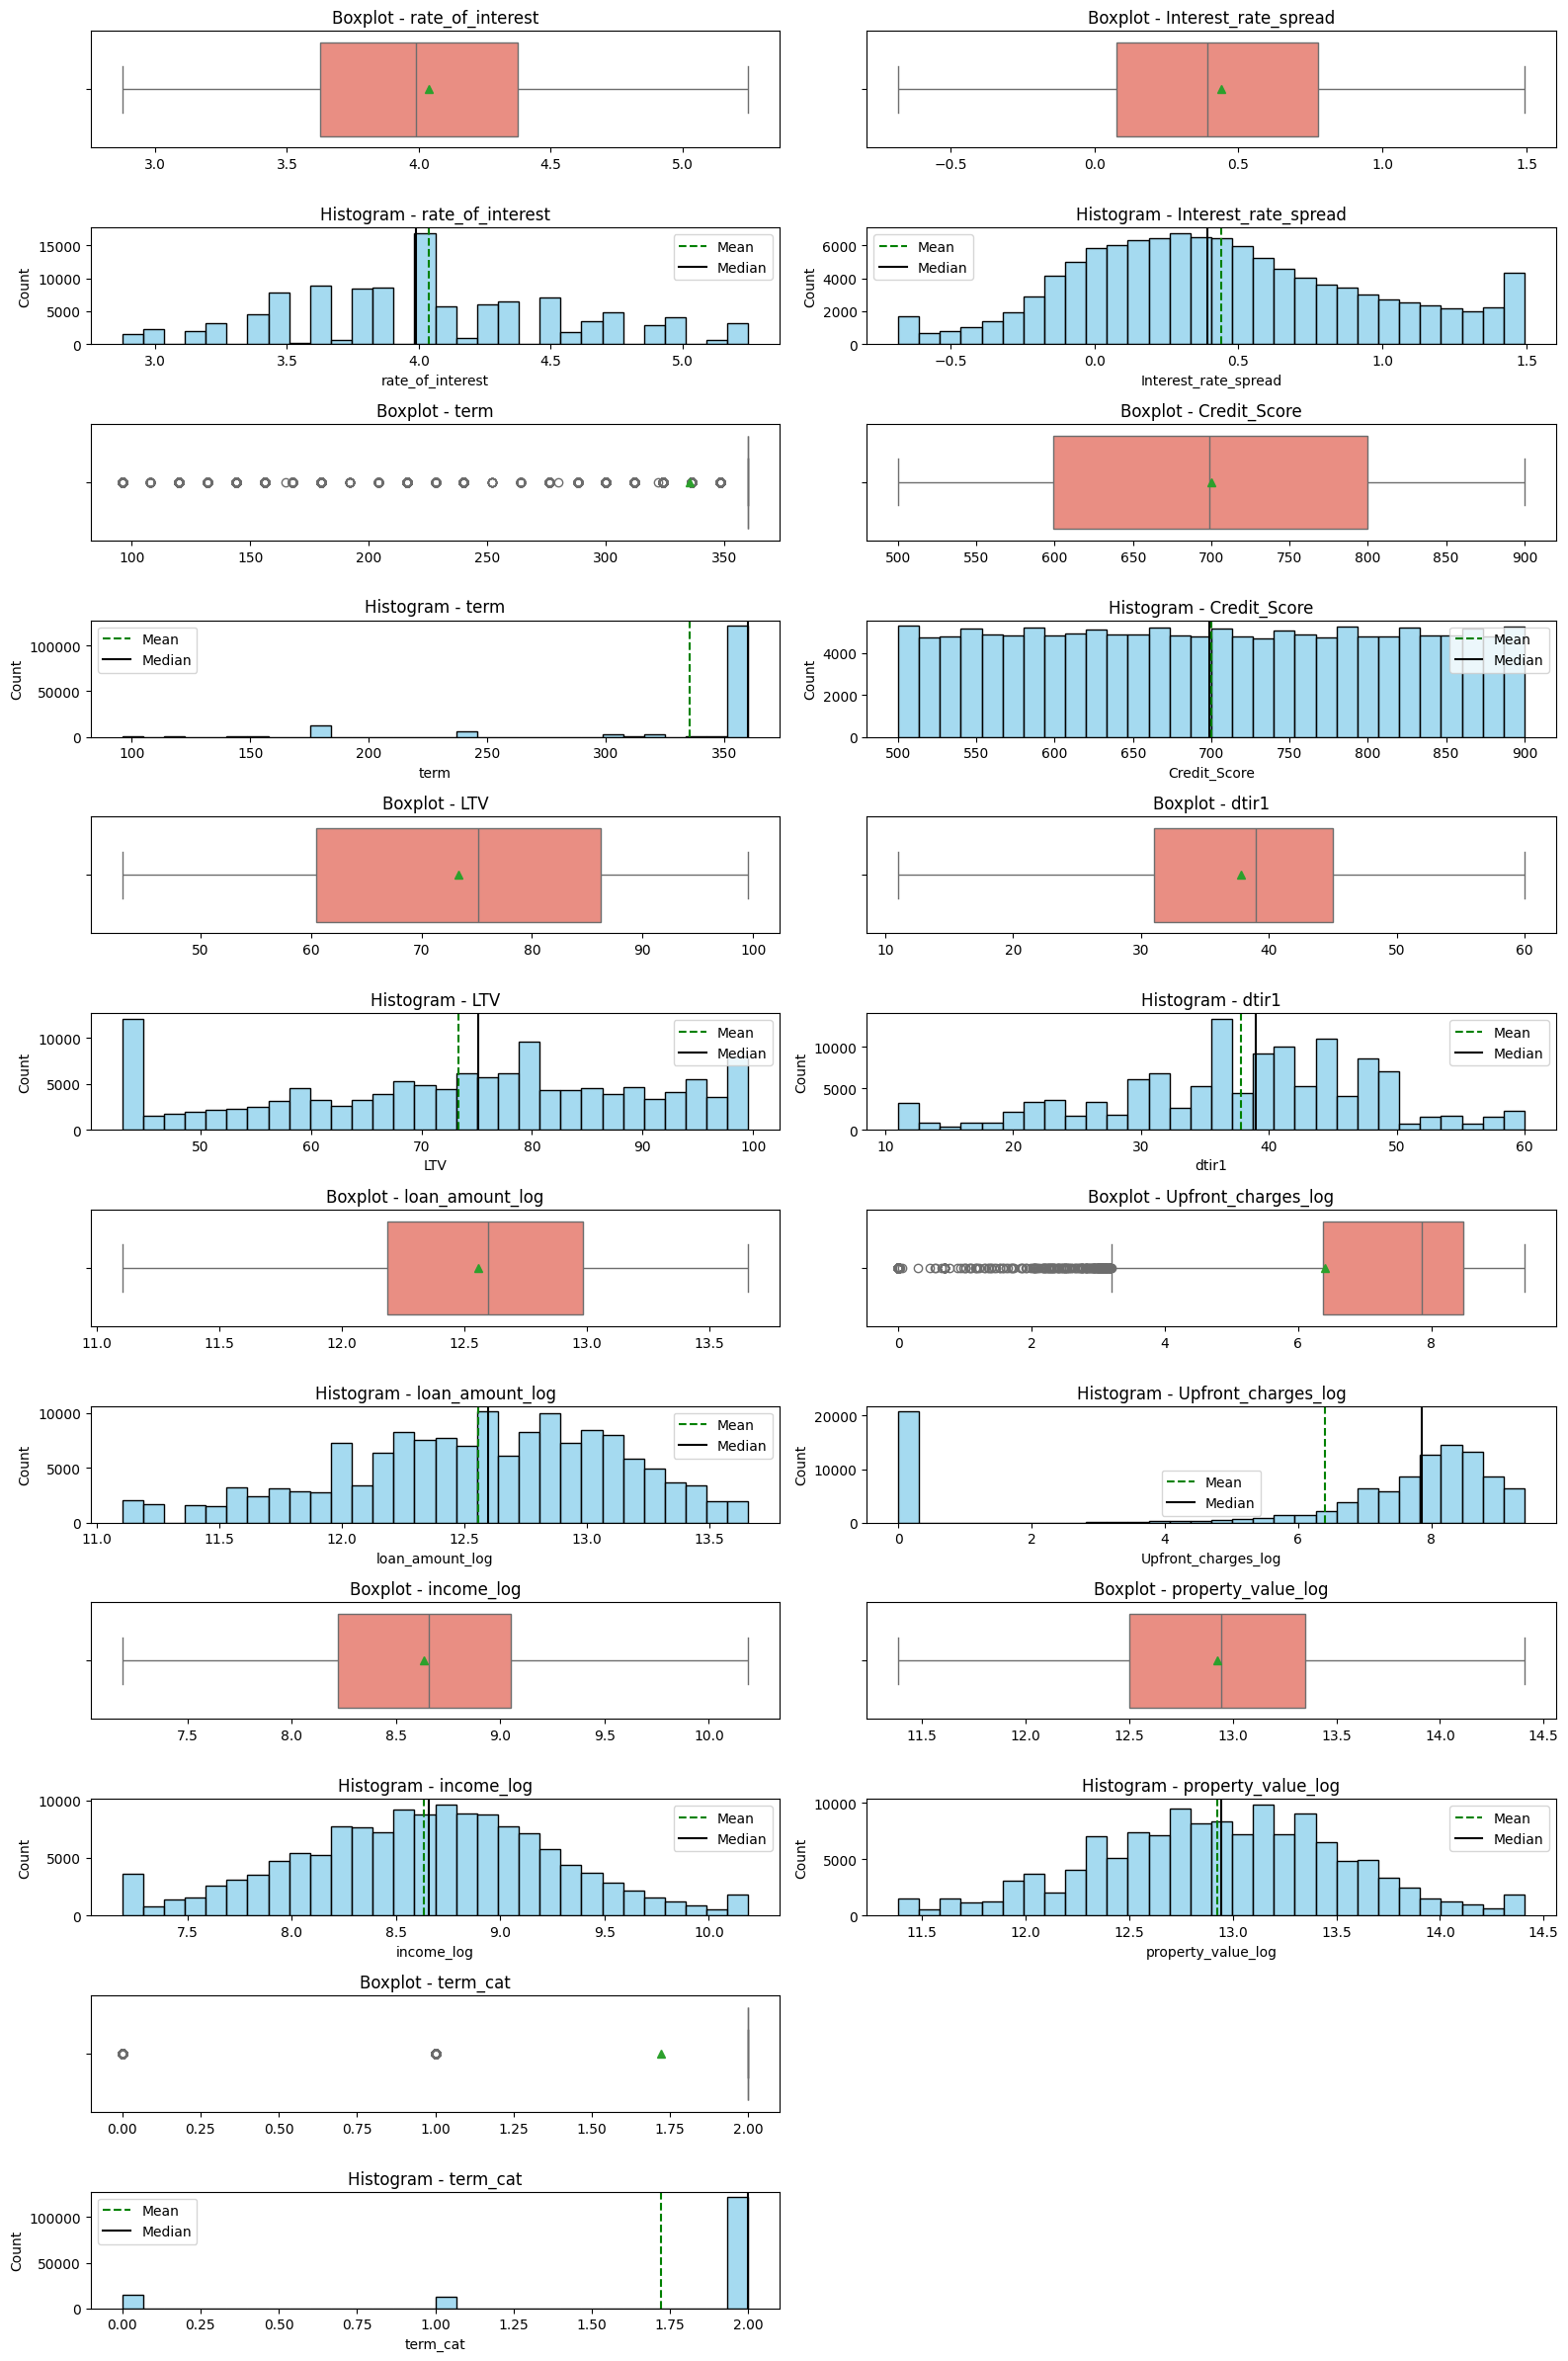

In [41]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude = ['ID', 'year', 'Status']
plot_cols = [col for col in numeric_cols if col not in cols_to_exclude]

n_cols = 2
n_rows = (len(plot_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows * 2, n_cols, figsize=(16, n_rows * 4), sharex=False)
axes = axes.reshape(n_rows * 2, n_cols)

for i, col in enumerate(plot_cols):
    row = (i // n_cols) * 2
    col_pos = i % n_cols

    sns.boxplot(
        x=df[col].dropna(),
        ax=axes[row, col_pos],
        showmeans=True,
        color='salmon'
    )
    axes[row, col_pos].set_title(f"Boxplot - {col}")
    axes[row, col_pos].set_xlabel("")

    sns.histplot(
        df[col].dropna(),
        kde=False,
        ax=axes[row + 1, col_pos],
        color='skyblue',
        bins=30
    )
    axes[row + 1, col_pos].axvline(df[col].mean(), color='green', linestyle='--', label='Mean')
    axes[row + 1, col_pos].axvline(df[col].median(), color='black', linestyle='-', label='Median')
    axes[row + 1, col_pos].legend()
    axes[row + 1, col_pos].set_title(f"Histogram - {col}")


total_plots = len(plot_cols)
extra_plots = (n_rows * n_cols) - total_plots
for j in range(extra_plots):
    fig.delaxes(axes[-1, -1 - j])
    fig.delaxes(axes[-2, -1 - j])

plt.tight_layout()
plt.show()


##Handling missing value

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  rate_of_interest           112231 non-null  float64
 11  Interest_rate_spread       112031 non-null  float64
 12  term                       148629 non-null  float64
 13  Neg_ammortization          14

In [45]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_info = pd.DataFrame({
    'missing_count': missing,
    'dtype': df[missing.index].dtypes
})

print(missing_info)


                           missing_count    dtype
Upfront_charges_log                39642  float64
Interest_rate_spread               36639  float64
rate_of_interest                   36439  float64
dtir1                              24121  float64
property_value_log                 15098  float64
LTV                                15098  float64
income_log                          9150  float64
loan_limit                          3344   object
approv_in_adv                        908   object
age                                  200   object
submission_of_application            200   object
loan_purpose                         134   object
Neg_ammortization                    121   object
term                                  41  float64
term_cat                              41  float64


| العمود                      | النسبة عند Status = 1 | الإجراء                     |
| --------------------------- | --------------------- | --------------------------- |
| `Interest_rate_spread`      | 100%                  | ❌ احذفه                     |
| `rate_of_interest`          | 100%                  | ❌ احذفه                     |
| `property_value`            | 99.99%                | ❌ احذفه                     |
| `LTV`                       | 99.99%                | ❌ احذفه                     |
| `age`                       | 100%                  | ❌ احذفه                     |
| `submission_of_application` | 100%                  | ❌ احذفه                     |
| `Upfront_charges`           | 92%                   | ❌ احذفه                     |
| `dtir1`                     | 67%                   | ❌ يفضل حذفه أو اختباره بدون |


In [46]:
# def cramers_v(x, y):
#     confusion_matrix = pd.crosstab(x, y)
#     chi2 = chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum().sum()
#     phi2 = chi2 / n
#     r,k = confusion_matrix.shape
#     phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
#     rcorr = r - ((r-1)**2)/(n-1)
#     kcorr = k - ((k-1)**2)/(n-1)
#     return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# # عمود يوضح إن كانت القيمة مفقودة في age
# df['age_is_missing'] = df['age'].isnull()

# # قائمة الأعمدة الفئوية الأخرى (غيّر حسب بياناتك)
# # cat_cols = ['loan_type', 'Gender', 'loan_purpose', 'Credit_Worthiness', 'loan_limit']  # وغيرهم
# cat_cols = df.select_dtypes(include='object').columns.tolist()
# # حساب Cramér's V بين age_is_missing وكل متغير فئوي
# results = {}
# for col in cat_cols:
#     results[col] = cramers_v(df['loan_limit'], df[col])

# # عرض النتائج مرتبة
# results = pd.Series(results).sort_values(ascending=False)
# print(results)


In [48]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'rate_of_interest', 'Interest_rate_spread',
       'term', 'Neg_ammortization', 'interest_only', 'lump_sum_payment',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'credit_type', 'Credit_Score', 'co-applicant_credit_type', 'age',
       'submission_of_application', 'LTV', 'Region', 'Security_Type', 'Status',
       'dtir1', 'loan_amount_log', 'Upfront_charges_log', 'income_log',
       'property_value_log', 'term_cat'],
      dtype='object')

In [49]:
df["Neg_ammortization"].unique()

array(['not_neg', 'neg_amm', nan], dtype=object)

In [ ]:
mode_value = df['Neg_ammortization'].mode()[0]
df['Neg_ammortization'].fillna(mode_value, inplace=True)


<div dir="rtl">
بالطبع، إليك شرحًا لكل متغير (عمود) في هذا الجدول من قاعدة البيانات، بناءً على أسمائه والمجال المحتمل (قروض أو تمويل عقاري). إذا كنت تعمل على تحليل أو نمذجة بيانات، فهذا سيساعدك على فهم المتغيرات بشكل أفضل:

* * *

### 💡 **المتغيرات الأساسية**

| العمود                       | الشرح                                                                           |
| ---------------------------- | ------------------------------------------------------------------------------- |
| **ID**                       | رقم تعريفي فريد لكل صف أو طلب.                                                  |
| **year**                     | سنة تقديم طلب القرض.                                                            |
| **loan\_limit**              | الحد الأعلى للقرض (قد يشير إلى نوع الحد، مثل "Conforming" أو "Non-conforming"). |
| **Gender**                   | جنس المتقدم (ذكر / أنثى / غير محدد).                                            |
| **approv\_in\_adv**          | هل تمت الموافقة على القرض بشكل مسبق؟                                            |
| **loan\_type**               | نوع القرض (على سبيل المثال: قرض عقاري، قرض شخصي...).                            |
| **loan\_purpose**            | الغرض من القرض (شراء منزل، تجديد، تعليم...).                                    |
| **Credit\_Worthiness**       | الجدارة الائتمانية للمقترض (جيد، ضعيف، إلخ).                                    |
| **open\_credit**              | ما إذا كان لدى العميل أرصدة ائتمانية مفتوحة.                                    |
| **business\_or\_commercial** | هل الغرض من القرض تجاري أو شخصي؟                                                |

* * *

### 💰 **تفاصيل القرض والتمويل**

| العمود                     | الشرح                                                              |
| -------------------------- | ------------------------------------------------------------------ |
| **loan\_amount**           | مبلغ القرض المطلوب.                                                |
| **rate\_of\_interest**     | معدل الفائدة المفروض على القرض.                                    |
| **Interest\_rate\_spread** | الفرق بين الفائدة المعروضة والمتوسطة في السوق (قد تدل على مخاطرة). |
| **Upfront\_charges**       | رسوم تدفع مقدماً مقابل القرض (رسوم فتح ملف، إلخ).                  |
| **term**                   | مدة القرض (بالسنوات أو الأشهر).                                    |

* * *

### 🏠 **تفاصيل العقار**

| العمود                 | الشرح                                           |
| ---------------------- | ----------------------------------------------- |
| **property\_value**    | قيمة العقار الممول.                             |
| **construction\_type** | نوع البناء (جديد، قائم...).                     |
| **occupancy\_type**    | نوع السكن (رئيسي، ثانوي، مؤجر...).              |
| **Secured\_by**        | ما إذا كان القرض مضمونًا بعقار أو شيء آخر.      |
| **total\_units**       | عدد الوحدات السكنية (1، 2، 3... منازل، شقق...). |

* * *

### 💳 **الائتمان والدخل**

| العمود                         | الشرح                                                               |
| ------------------------------ | ------------------------------------------------------------------- |
| **income**                     | دخل المقترض السنوي.                                                 |
| **credit\_type**               | نوع الائتمان المستخدم (تقارير ائتمانية مثل Equifax أو Experian...). |
| **Credit\_Score**              | درجة الائتمان (عادة بين 300 و850).                                  |
| **co-applicant\_credit\_type** | نوع الائتمان الخاص بالمتقدم المشترك، إن وجد.                        |

* * *

### 🔁 **شروط السداد**

| العمود                 | الشرح                                                          |
| ---------------------- | -------------------------------------------------------------- |
| **Neg\_ammortization** | هل يحتوي القرض على تسديد سلبي (تتراكم الفائدة بدلاً من دفعها). |
| **interest\_only**     | هل القرض فائدة فقط لفترة معينة؟                                |
| **lump\_sum\_payment** | هل يمكن تسديد مبلغ دفعة واحدة؟                                 |

* * *

### 👤 **بيانات المتقدم**

| العمود                          | الشرح                                        |
| ------------------------------- | -------------------------------------------- |
| **age**                         | عمر المتقدم (قد يكون في فئات عمرية أو رموز). |
| **submission\_of\_application** | هل تم تقديم الطلب إلكترونيًا أم يدويًا؟      |
| **Region**                      | المنطقة الجغرافية للطلب.                     |
| **Security\_Type**              | نوع الضمان المرتبط بالقرض.                   |

* * *

### 📈 **مؤشرات مالية أخرى**

| العمود     | الشرح                                                                    |
| ---------- | ------------------------------------------------------------------------ |
| **LTV**    | **Loan-To-Value** نسبة القرض إلى قيمة العقار (كلما زادت، زادت المخاطرة). |
| **Status** | حالة القرض (مقبول، مرفوض، قيد المراجعة... يحددها الرقم).                 |
| **dtir1**  | **Debt-To-Income Ratio** النسبة بين الدين والدخل؛ مؤشر على قدرة السداد.  |

* * *

إذا أردت ترجمة أو توضيح أي متغير بمصطلحات مالية عربية دقيقة، أو تحليل القيم الناقصة أو المتغيرات النوعية، فأخبرني وسأساعدك بالتفصيل.
</div>